## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import time

## Creating Data

In [2]:
x = torch.linspace(0, 799, 800)

In [3]:
y = torch.sin(x*2*3.1416/40)

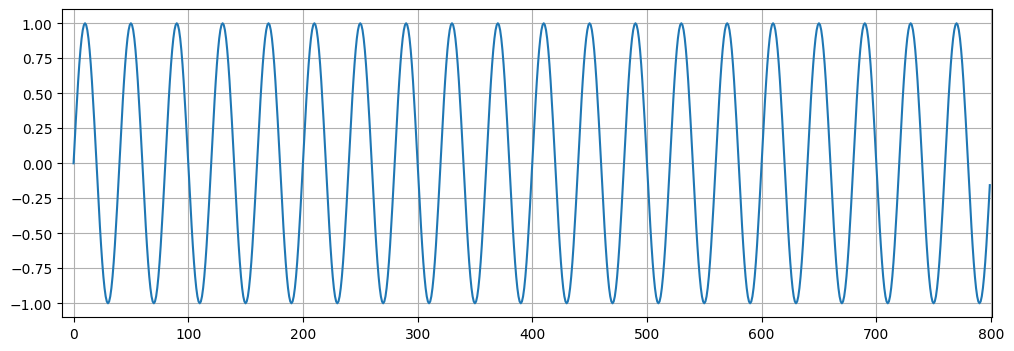

In [4]:
plt.figure(figsize=(12,4))
plt.xlim(-10, 801)
plt.grid(True)
plt.plot(y.numpy())

## Train Test Split

In [5]:
test_size = 40
train_set = y[:-test_size]
test_set = y[-test_size:]

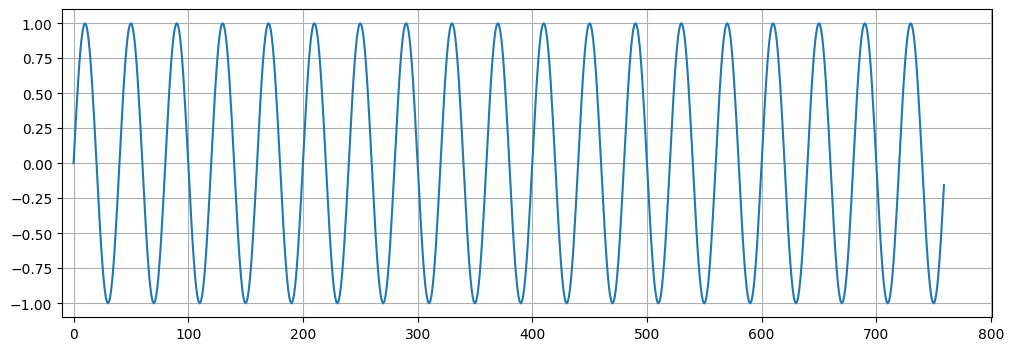

In [6]:
plt.figure(figsize=(12,4))
plt.xlim(-10, 801)
plt.grid(True)
plt.plot(train_set.numpy())

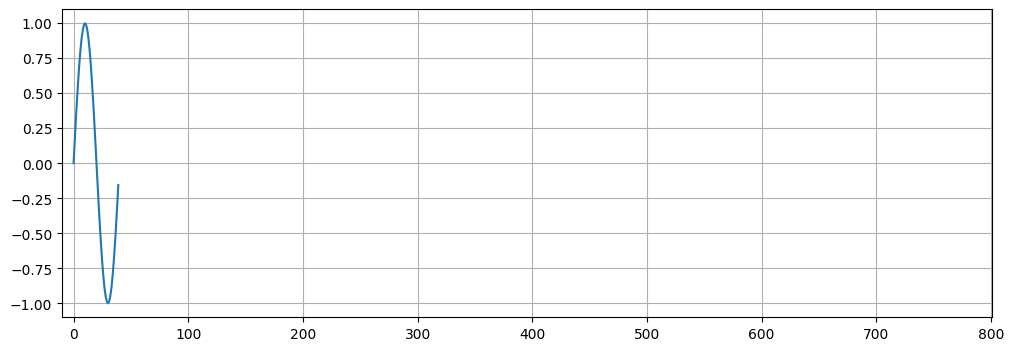

In [7]:
plt.figure(figsize=(12,4))
plt.xlim(-10, 801)
plt.grid(True)
plt.plot(test_set.numpy())

## Preparaing Training Sequences

In [8]:
def input_data(sequence, window_size):
    output = []    # List of tuples
    length_of_sequence = len(sequence)

    for i in range(length_of_sequence - window_size):
        window = sequence[i: i + window_size]
        label = sequence[i + window_size: i + window_size + 1]
        output.append((window, label))

    return output

In [9]:
window_size = 40

train_data = input_data(
    sequence=train_set,
    window_size=window_size
)

In [10]:
len(train_data)

720

In [11]:
# train_data

In [12]:
train_data[1]

(tensor([ 1.5643e-01,  3.0902e-01,  4.5399e-01,  5.8779e-01,  7.0711e-01,
          8.0902e-01,  8.9101e-01,  9.5106e-01,  9.8769e-01,  1.0000e+00,
          9.8769e-01,  9.5106e-01,  8.9100e-01,  8.0901e-01,  7.0710e-01,
          5.8778e-01,  4.5398e-01,  3.0901e-01,  1.5643e-01, -7.2400e-06,
         -1.5644e-01, -3.0902e-01, -4.5400e-01, -5.8779e-01, -7.0711e-01,
         -8.0902e-01, -8.9101e-01, -9.5106e-01, -9.8769e-01, -1.0000e+00,
         -9.8769e-01, -9.5105e-01, -8.9100e-01, -8.0901e-01, -7.0710e-01,
         -5.8777e-01, -4.5398e-01, -3.0900e-01, -1.5642e-01,  1.4480e-05]),
 tensor([0.1564]))

## Creating LSTM Model

In [13]:
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, output_size=1):
        super().__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size)
        self.linear = nn.Linear(hidden_size, output_size)
        self.hidden = (torch.zeros(1,1,hidden_size), torch.zeros(1,1,hidden_size))

    def forward(self, sequence):
        lstm_out, self.hidden = self.lstm(sequence.view(len(sequence), 1, -1), self.hidden)
        prediction = self.linear(lstm_out.view(len(sequence), -1))
        return prediction[-1]

## Training the Model

In [14]:
model = LSTM()
model

LSTM(
  (lstm): LSTM(1, 50)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)

In [15]:
parameter_list = []
for param in model.parameters():
    parameter_list.append(param.numel())

print(f"Total Number of Parameters: {sum(parameter_list)}")

Total Number of Parameters: 10651


In [16]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [17]:
train_set[-window_size:].tolist()

[0.0002596856211312115,
 0.15669289231300354,
 0.30926769971847534,
 0.45422035455703735,
 0.5879955291748047,
 0.7072919607162476,
 0.8091720938682556,
 0.8911271691322327,
 0.9511368870735168,
 0.9877293109893799,
 1.0,
 0.9876466989517212,
 0.950973629951477,
 0.8908873796463013,
 0.8088615536689758,
 0.7069184184074402,
 0.5875681638717651,
 0.4537496268749237,
 0.3087652921676636,
 0.15617111325263977,
 -0.0002685945073608309,
 -0.1567016988992691,
 -0.30927619338035583,
 -0.4542282819747925,
 -0.5880027413368225,
 -0.7072982788085938,
 -0.8091772794723511,
 -0.8911312222480774,
 -0.9511396288871765,
 -0.9877306818962097,
 -0.9999999403953552,
 -0.9876452684402466,
 -0.9509708881378174,
 -0.8908833265304565,
 -0.8088563084602356,
 -0.706912100315094,
 -0.5875609517097473,
 -0.4537416994571686,
 -0.3087567985057831,
 -0.1561623215675354]

Epoch: 0 Loss: 0.07900524884462357
Performance on test range: 0.5862200260162354
Epoch: 1 Loss: 0.05280134826898575
Performance on test range: 0.542568027973175
Epoch: 2 Loss: 0.025606093928217888
Performance on test range: 0.462319552898407
Epoch: 3 Loss: 0.004447448533028364
Performance on test range: 0.21489445865154266
Epoch: 4 Loss: 0.00034799243439920247
Performance on test range: 0.02006818726658821
Epoch: 5 Loss: 0.00011140989226987585
Performance on test range: 0.004400170873850584
Epoch: 6 Loss: 9.611745190341026e-05
Performance on test range: 0.003575496841222048
Epoch: 7 Loss: 9.695666085463017e-05
Performance on test range: 0.003447317285463214
Epoch: 8 Loss: 9.83549834927544e-05
Performance on test range: 0.0033679320476949215
Epoch: 9 Loss: 9.888445492833853e-05
Performance on test range: 0.003286798018962145


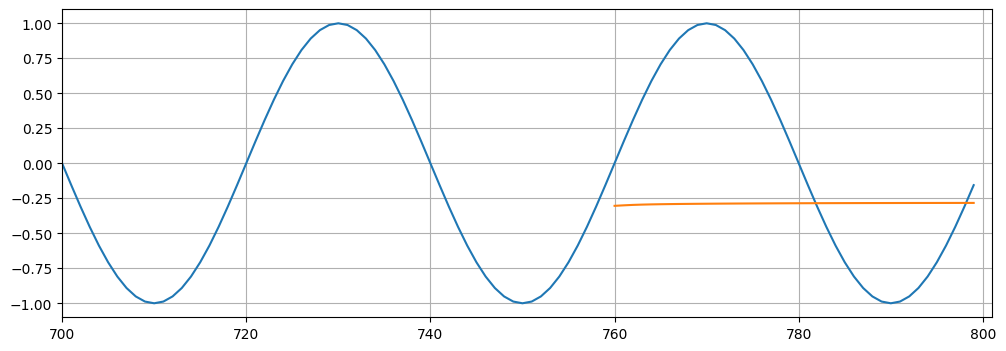

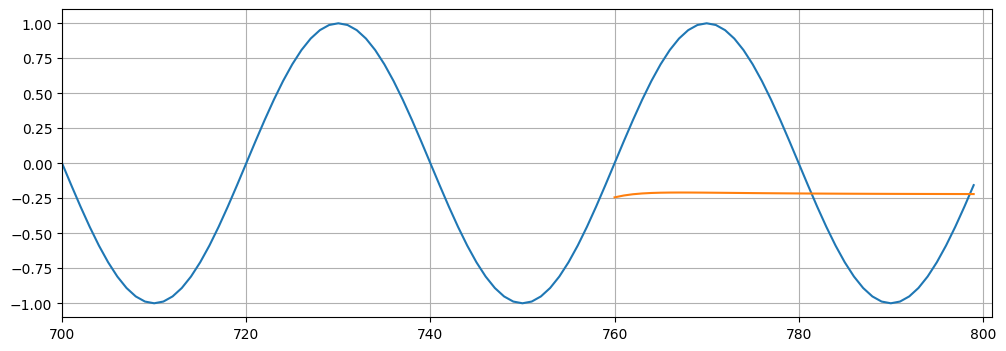

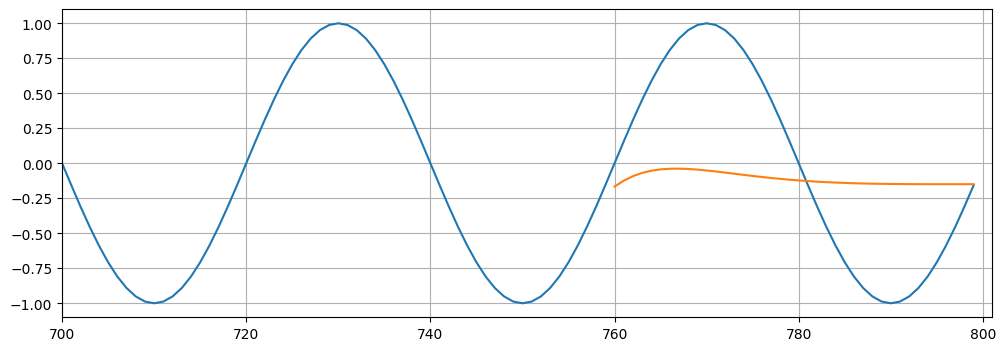

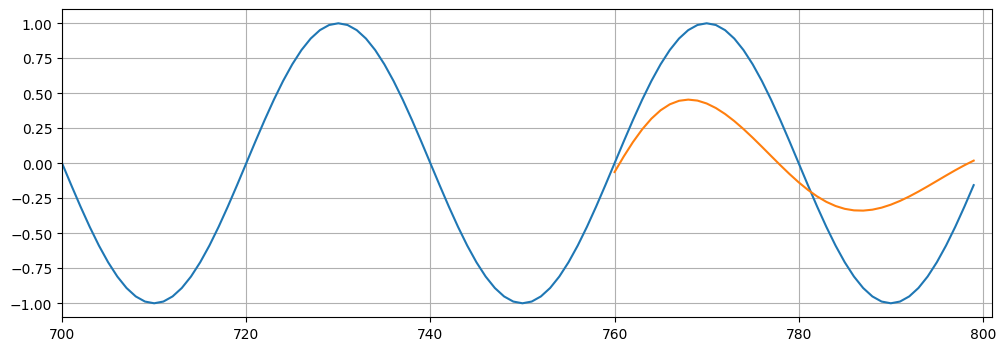

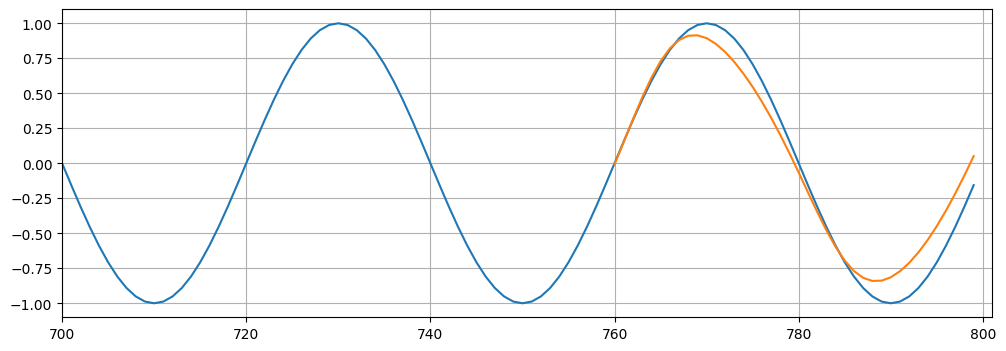

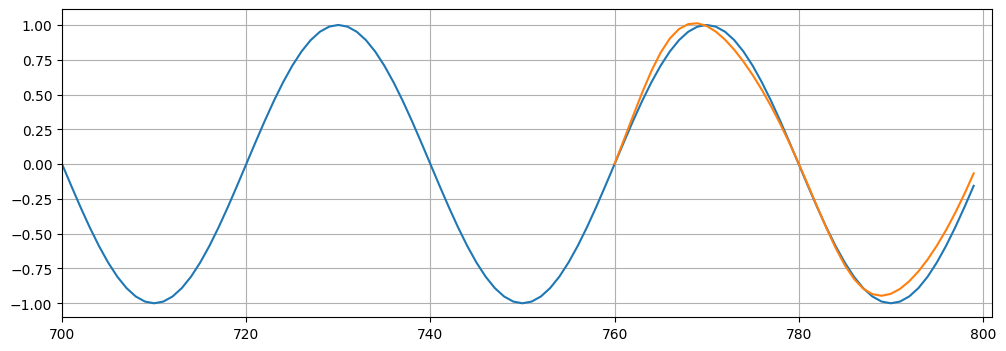

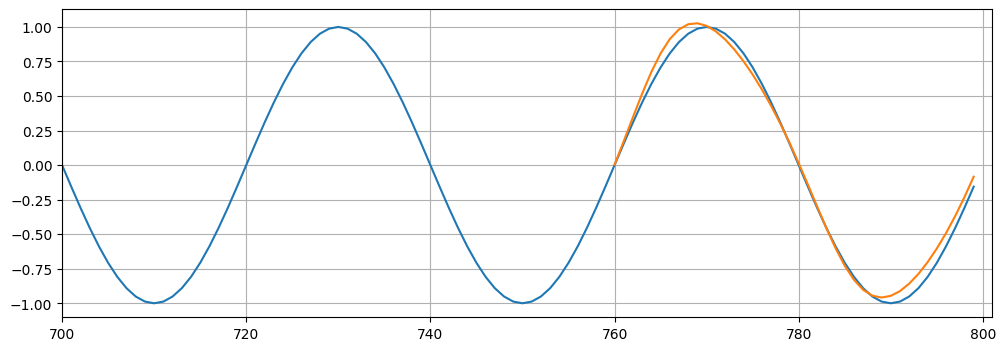

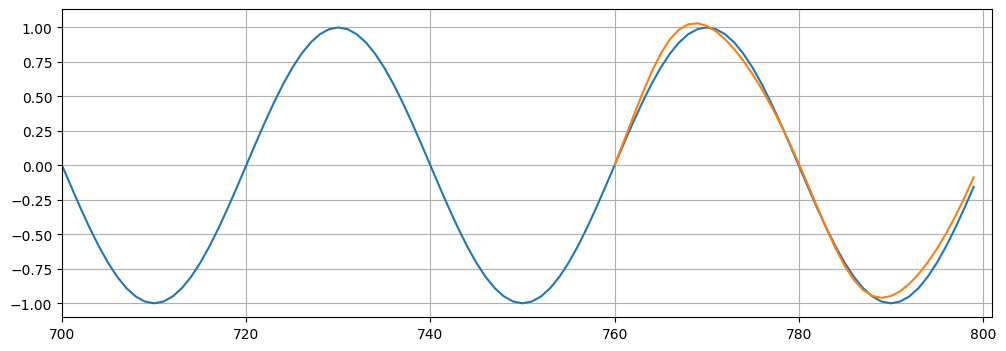

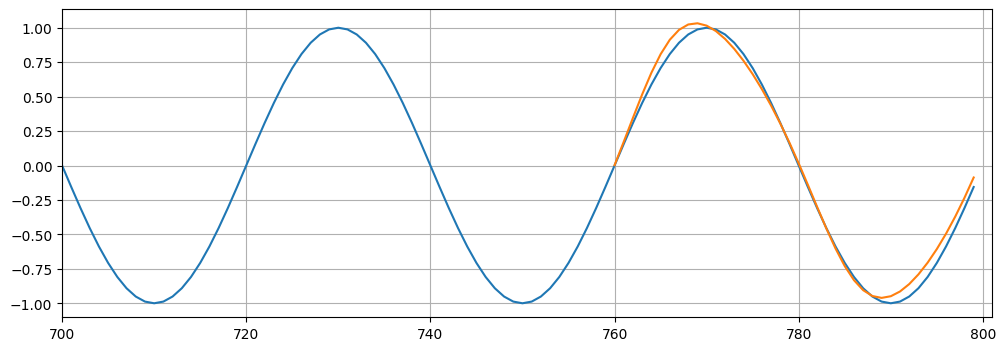

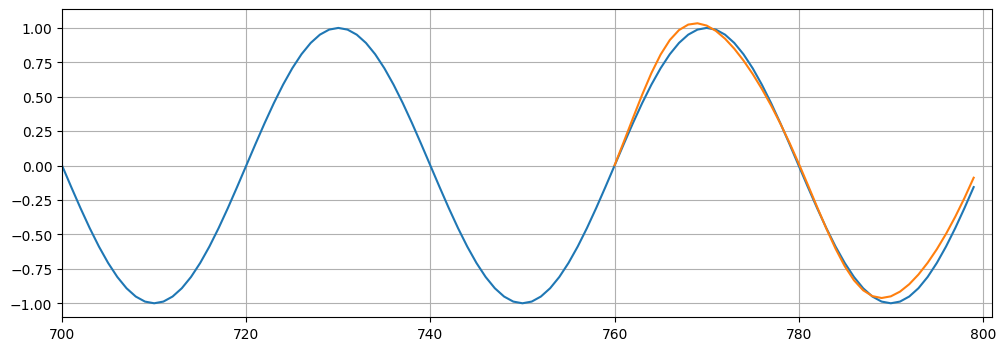

In [18]:
epochs = 10
future_forecast = 40

for epoch in range(epochs):
    for sequence, y_train in train_data:
        optimizer.zero_grad()
        model.hidden = (
            torch.zeros(1,1,model.hidden_size), 
            torch.zeros(1,1,model.hidden_size)
        )

        y_pred = model(sequence)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()

    print(f"Epoch: {epoch} Loss: {loss.item()}")

    preds = train_set[-window_size:].tolist()

    for forecast in range(future_forecast):
        sequence = torch.FloatTensor(preds[-window_size:])

        with torch.no_grad():
            model.hidden = (
                torch.zeros(1,1,model.hidden_size), 
                torch.zeros(1,1,model.hidden_size)
        )

        preds.append(model(sequence).item())

    loss = criterion(torch.tensor(preds[-window_size:]), y[760:])
    print(f"Performance on test range: {loss}")

    plt.figure(figsize=(12,4))
    plt.xlim(700, 801)
    plt.grid(True)
    plt.plot(y.numpy())
    plt.plot(range(760, 800), preds[window_size:])

## Retrained on All Data

In [19]:
epochs = 15
window_size = 40
future_forecast = 40

all_data = input_data(y, window_size)
len(all_data)

760

In [20]:
start_time = time.time()

for epoch in range(epochs):
    for sequence, y_train in train_data:
        optimizer.zero_grad()
        model.hidden = (
            torch.zeros(1,1,model.hidden_size), 
            torch.zeros(1,1,model.hidden_size)
        )

        y_pred = model(sequence)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()

    print(f"Epoch: {epoch} Loss: {loss.item()}")

total_time = time.time() - start_time
print(f"Total Time: {total_time / 60}")

Epoch: 0 Loss: 9.857412078417838e-05
Epoch: 1 Loss: 9.759244130691513e-05
Epoch: 2 Loss: 9.609320113668218e-05
Epoch: 3 Loss: 9.420654532732442e-05
Epoch: 4 Loss: 9.203470108332112e-05
Epoch: 5 Loss: 8.966313907876611e-05
Epoch: 6 Loss: 8.716496813576669e-05
Epoch: 7 Loss: 8.458967931801453e-05
Epoch: 8 Loss: 8.198094292310998e-05
Epoch: 9 Loss: 7.937190821394324e-05
Epoch: 10 Loss: 7.678259862586856e-05
Epoch: 11 Loss: 7.423905481118709e-05
Epoch: 12 Loss: 7.174870552262291e-05
Epoch: 13 Loss: 6.93244073772803e-05
Epoch: 14 Loss: 6.697030767099932e-05
Total Time: 0.134270977973938


## Forecasting into Unknown Future

In [21]:
preds = y[-window_size:].tolist()

for forecast in range(future_forecast):
    sequence = torch.FloatTensor(preds[-window_size:])

    with torch.no_grad():
        model.hidden = (
            torch.zeros(1,1,model.hidden_size), 
            torch.zeros(1,1,model.hidden_size)
        )

        preds.append(model(sequence).item())

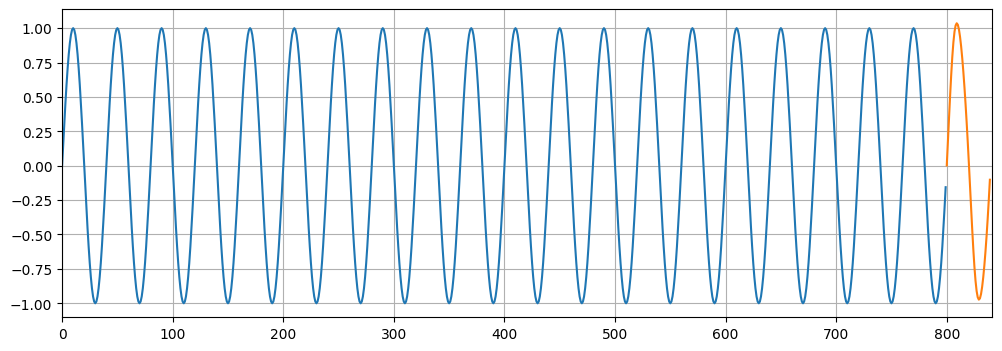

In [22]:
plt.figure(figsize=(12,4))
plt.xlim(0, 841)
plt.grid(True)
plt.plot(y.numpy())
plt.plot(range(800, 840), preds[window_size:])